In [2]:
from sklearn.decomposition import PCA
import data_prep as dp
import matplotlib.pyplot as plt
import statistics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
import datetime as dt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy
import pickle
from plot_functions import boxplot_accuracy,bar_itr,plot_timeline

def itr(ac):
    itr = (np.log2(6)+ ac*np.log2(ac)+ (1-ac)* np.log2((1-ac)/(6-1)))*10
    return itr



pd.set_option('display.max_columns', 1500) 
pd.set_option('display.max_rows', 1500) 

In [19]:
!pip install openpyxl

In [3]:
def boxplot_accuracy(data,name:str):
    means = data.loc[(data.Ep2Avg==8)].groupby("Classifier").mean()["Accuracy"].to_list()
    names = data.loc[(data.Ep2Avg==8)].groupby("Classifier").mean().index.to_list()
    sorted_classifiers = np.array(sorted( zip(means, names)))
    df_list = []
    for classifier in sorted_classifiers[:,1]:
        df = data.loc[(data.Classifier == classifier)& (data.Ep2Avg == 8)]
        df_list.append(df.Accuracy*100)
    fig,ax = plt.subplots(figsize=(14,5))
    ax.boxplot(df_list,labels= sorted_classifiers[:,1],widths=0.3)
    ax.set_xticklabels(sorted_classifiers[:,1],rotation=30,ha='right')
    ax.set_ylabel("Accuracy (%)")
    fig.suptitle("Accuracy " +name)
    plt.savefig(r"D:\Google Drive\Master\Masterarbeit\Graphics\accuracy_boxplot_"+name+".png",bbox_inches="tight",pad_inches=0.2)

def bar_itr(data,name:str):
    fig,ax = plt.subplots(figsize=(16,5))

    means = data.loc[(data.Ep2Avg==8)].groupby("Classifier").mean()["ITR"].to_list()
    names = data.loc[(data.Ep2Avg==8)].groupby("Classifier").mean().index.to_list()
    sorted_classifiers = np.array(sorted( zip(means, names)))
    values = [float(i) for i in sorted_classifiers[:,0]]
    df_list = []

    ax.bar(sorted_classifiers[:,1],values,width =0.25)
    ax.set_xticklabels(sorted_classifiers[:,1],rotation=30,ha='right')
    ax.set_ylabel("ITR (Bits/Minuite)")
    fig.suptitle("ITR " + name)
    plt.savefig(r"D:\Google Drive\Master\Masterarbeit\Graphics\ITR_boxplot_"+name+".png",bbox_inches="tight",pad_inches=0.2)
    
def plot_timeline(tar_df, ntar_df,electrode,title):
    col_list= ["#d8b365","#5ab4ac","#ef8a62","#67a9cf"]
    lr = LinearRegression()

    x = tar_df.index.map(dt.datetime.toordinal).to_numpy()
    x = x.reshape(-1,1)

    fig, ax = plt.subplots(figsize = (12,5))
    y = tar_df["Mean Amplitude"].to_numpy()-ntar_df["Mean Amplitude"].to_numpy()
    y.reshape(-1,1)
    lr.fit(x,y)
    pred = lr.predict(x)
    ax.axvline(x=tar_df.index.values[12],lw=1,alpha=1,zorder=0,c=col_list[2])
    ax.axvline(x=tar_df.index.values[21],lw=1,alpha=1,zorder=0,c=col_list[3])
    tar = ax.bar(tar_df.index,tar_df["Mean Amplitude"], width=1,color=col_list[1])
    ntar = ax.bar(tar_df.index,ntar_df["Mean Amplitude"], width=1,color=col_list[0])
    trend = ax.plot(tar_df.index,pred,c="k",ls=":",lw=0.85)
    lgd =ax.legend(["SetB","Tactilo Relacement","Difference Trend", "Target", "NonTarget"], ncol=5, title=title,loc='center', bbox_to_anchor=(0.5, 1.13),fontsize='small', fancybox=True)
    #ax.set_title(electrode)
    ax.axhline(y=0,c='k',lw=0.5)
    ax.set_ylabel("µV")

    ax.set_xlabel("Session Date")
    #fig.suptitle(title)
    fig.tight_layout
    plt.savefig(r"D:\Google Drive\Master\Masterarbeit\Graphics\Timeline.png",bbox_inches="tight",pad_inches=0.2)

# Load Data

In [4]:
sess3 = pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Classifier_Results\sess3.csv")
sess1 = pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Classifier_Results\sess1.csv")
trans3 = pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Classifier_Results\trans3.csv")
trans1= pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Classifier_Results\trans1.csv")
all_con= pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Classifier_Results\trans1.csv")

## create table for Latex

In [6]:
s3 = sess3.loc[(sess3.Ep2Avg==8)].groupby("Classifier").mean()[["Accuracy","ITR"]]
s1 = sess1.loc[(sess1.Ep2Avg==8)].groupby("Classifier").mean()[["Accuracy","ITR"]]
t3 = trans3.loc[(trans3.Ep2Avg==8)].groupby("Classifier").mean()[["Accuracy","ITR"]]
t1 = trans1.loc[(trans1.Ep2Avg==8)].groupby("Classifier").mean()[["Accuracy","ITR"]]

con_dic = {"sess3":s3,"sess1":s1,"trans1":t1,"trans3":t3}
print(pd.concat(con_dic.values(), axis=1, keys=con_dic.keys()).round(2).to_latex(caption=("Average Accuracy and ITR","Average Accuracy and ITR for all conditions")))




\begin{table}
\centering
\caption[Average Accuracy and ITR for all conditions]{Average Accuracy and ITR}
\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{sess3} & \multicolumn{2}{l}{sess1} & \multicolumn{2}{l}{trans1} & \multicolumn{2}{l}{trans3} \\
{} & Accuracy &   ITR & Accuracy &   ITR & Accuracy &   ITR & Accuracy &   ITR \\
Classifier      &          &       &          &       &          &       &          &       \\
\midrule
BCI2000         &     0.60 &  1.45 &     0.41 &  0.55 &     0.53 &  1.05 &     0.63 &  1.67 \\
FGMDM           &     0.56 &  1.22 &     0.38 &  0.38 &     0.38 &  0.30 &     0.47 &  0.66 \\
FGMDM\_res       &     0.62 &  1.56 &     0.44 &  0.58 &     0.44 &  0.59 &     0.47 &  0.68 \\
FGMDM\_res\_xDawn &     0.69 &  2.17 &     0.59 &  1.58 &     0.46 &  0.61 &     0.66 &  1.78 \\
FGMDM\_xDawn     &     0.72 &  2.35 &     0.62 &  1.68 &     0.50 &  0.83 &     0.62 &  1.51 \\
LDA             &     0.60 &  1.44 &     0.33 &  0.27 &     0.29 &  0.26 &

In [16]:
sess3.loc[(sess3.Ep2Avg==8)].groupby("Classifier").mean()[["Accuracy","ITR"]]

,Accuracy,ITR
Classifier,,
BCI2000,0.595641,1.453256
FGMDM,0.555556,1.218157
FGMDM_res,0.618234,1.562500
FGMDM_res_xDawn,0.689459,2.167749
FGMDM_xDawn,0.723647,2.352341
LDA,0.599715,1.443768
LDA_xDawn,0.653846,1.740370
MDM,0.481481,1.034677
MDM_res,0.326211,0.316505


In [24]:
print(pd.read_excel(r"D:\Master\Masterarbeit\Data\h5.xlsx").to_latex())

\begin{tabular}{llllllll}
\toprule
{} &       sess3 &  Unnamed: 1 & Unnamed: 2 & Unnamed: 3 &       sess1 & Unnamed: 5 & Unnamed: 6 \\
\midrule
0  &  Classifier &  unfiltered &      xDawn &    p-value &  unfiltered &      xDawn &    p-value \\
1  &         LDA &          60 &         65 &          1 &          33 &         51 &          0 \\
2  &   shrinkLDA &          66 &         72 &          1 &          50 &         59 &       0.78 \\
3  &         MDM &          48 &         64 &       0.25 &          44 &         58 &       0.19 \\
4  &       FGMDM &          56 &         72 &          0 &          38 &         62 &          0 \\
5  &     MDM\_res &          33 &         56 &          1 &          33 &         52 &          0 \\
6  &   FGMDM\_res &          62 &         69 &          1 &          44 &         59 &       0.02 \\
7  &         NaN &         NaN &        NaN &        NaN &         NaN &        NaN &        NaN \\
8  &         NaN &         NaN &        NaN &        N

### Boxplots Accuracy and Barplot ITR

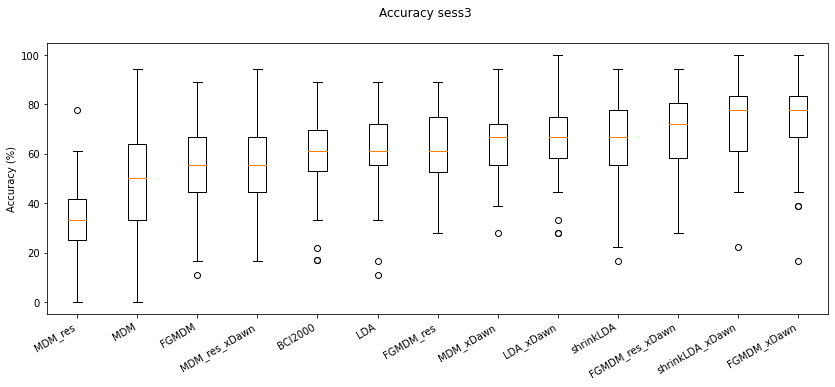

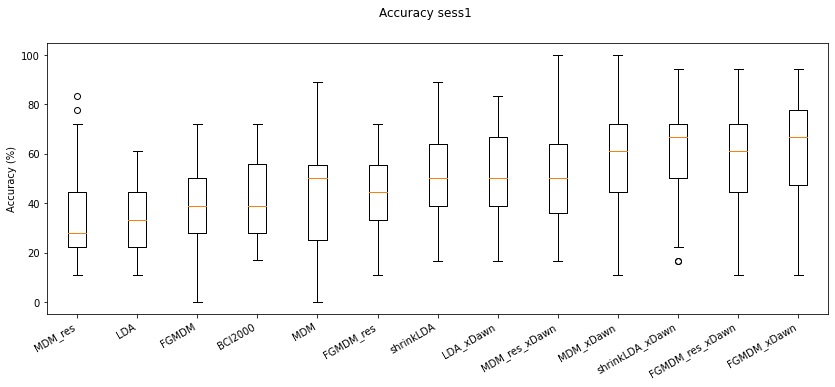

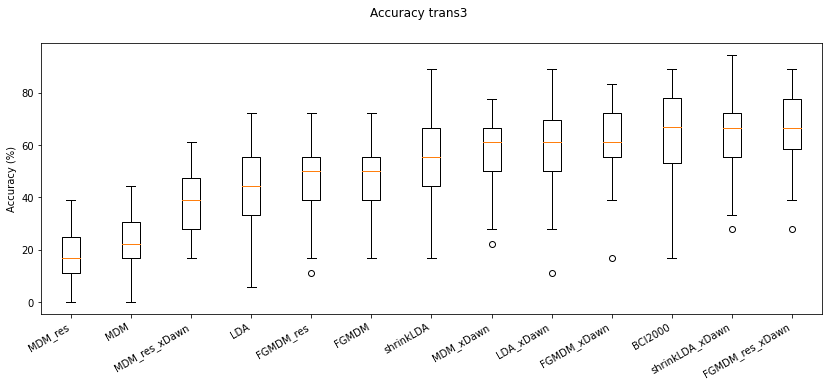

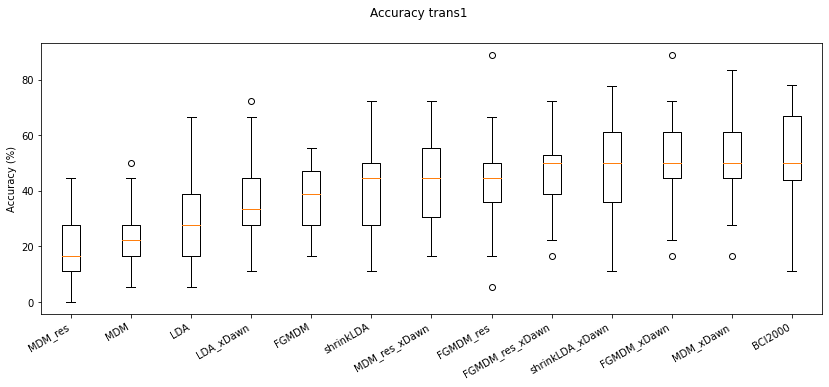

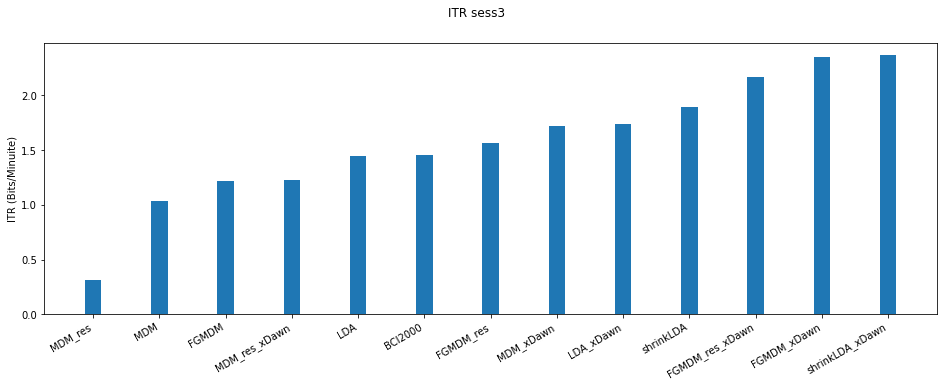

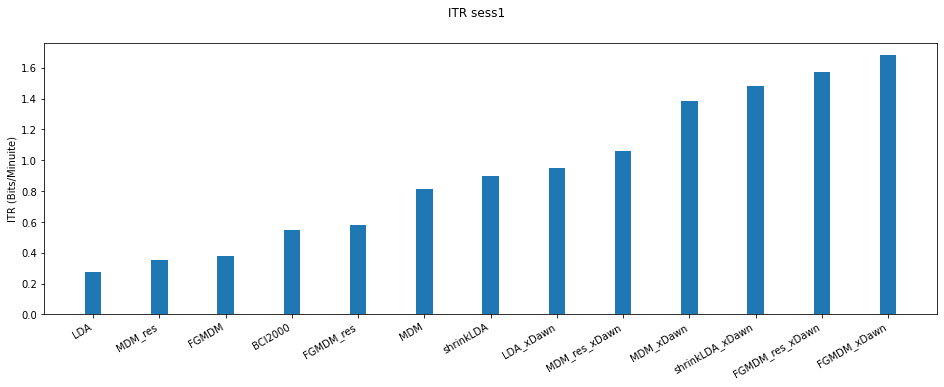

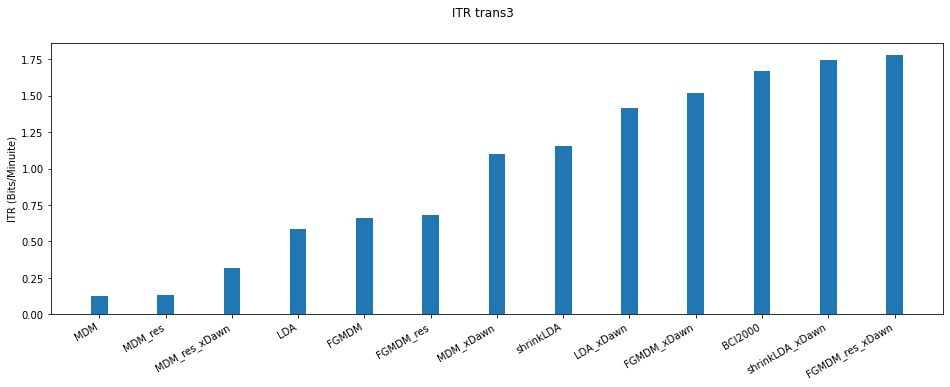

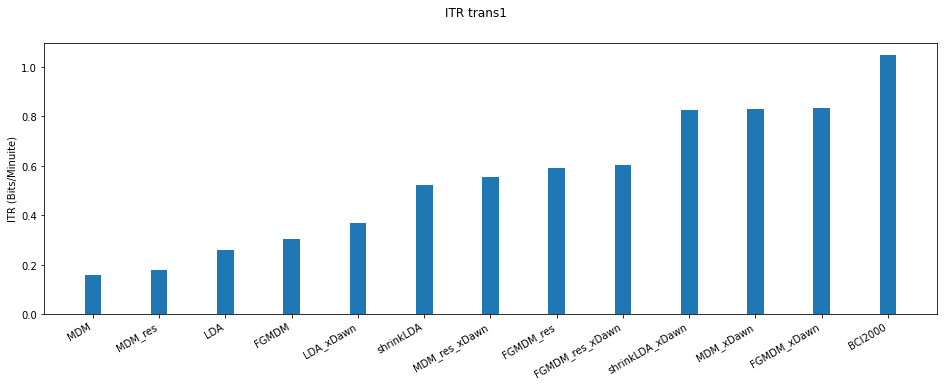

In [34]:
boxplot_accuracy(sess3,"sess3")
boxplot_accuracy(sess1,"sess1")
boxplot_accuracy(trans3,"trans3")
boxplot_accuracy(trans1,"trans1")
bar_itr(sess3,"sess3")
bar_itr(sess1,"sess1")
bar_itr(trans3,"trans3")
bar_itr(trans1,"trans1")

In [15]:
print(sess3.loc[(sess3.Ep2Avg==8)].groupby("Classifier").mean().sort_values("Accuracy"))
print(sess1.loc[(sess1.Ep2Avg==8)].groupby("Classifier").mean().sort_values("Accuracy"))
print(trans3.loc[(trans3.Ep2Avg==8)].groupby("Classifier").mean().sort_values("Accuracy"))
print(trans1.loc[(trans1.Ep2Avg==8)].groupby("Classifier").mean().sort_values("Accuracy"))

                 Accuracy  Session  Ep2Avg       ITR
Classifier                                          
MDM_res          0.326211     20.0     8.0  0.316505
MDM              0.481481     20.0     8.0  1.034677
FGMDM            0.555556     20.0     8.0  1.218157
MDM_res_xDawn    0.556980     20.0     8.0  1.226673
BCI2000          0.595641     20.0     8.0  1.453256
LDA              0.599715     20.0     8.0  1.443768
FGMDM_res        0.618234     20.0     8.0  1.562500
MDM_xDawn        0.642450     20.0     8.0  1.717573
LDA_xDawn        0.653846     20.0     8.0  1.740370
shrinkLDA        0.655271     20.0     8.0  1.892888
FGMDM_res_xDawn  0.689459     20.0     8.0  2.167749
shrinkLDA_xDawn  0.722222     20.0     8.0  2.363274
FGMDM_xDawn      0.723647     20.0     8.0  2.352341
                 Accuracy  Session  Ep2Avg       ITR
Classifier                                          
MDM_res          0.329060     20.0     8.0  0.351418
LDA              0.334758     20.0     8.0  0.

### Sessionwise ranking

In [35]:
best_performance =pd.DataFrame(columns=["Classifier"])
worst_performance =pd.DataFrame(columns=["Classifier"])
for session in range(1,40):
    df = sess3.loc[(sess3.Ep2Avg==8) &(sess3.Session==session)]
    print(session)
    print(df.Accuracy.max())
    print(df.loc[df.Accuracy == df.Accuracy.max()]["Classifier"])
    print("___________________________________")
    best_performance = best_performance.append(df.loc[df.Accuracy == df.Accuracy.max()])
    worst_performance = worst_performance.append(df.loc[df.Accuracy == df.Accuracy.min()])

1
0.67
3751    BCI2000
Name: Classifier, dtype: object
___________________________________
2
0.5555555555555556
1287          LDA_xDawn
1295    shrinkLDA_xDawn
2535                LDA
2543          shrinkLDA
Name: Classifier, dtype: object
___________________________________
3
0.6111111111111112
1319    LDA_xDawn
Name: Classifier, dtype: object
___________________________________
4
0.3888888888888889
55    MDM_res_xDawn
Name: Classifier, dtype: object
___________________________________
5
0.7222222222222222
1399    MDM_xDawn
Name: Classifier, dtype: object
___________________________________
6
0.7777777777777778
87        MDM_res_xDawn
1423    shrinkLDA_xDawn
Name: Classifier, dtype: object
___________________________________
7
0.5
2695    LDA
Name: Classifier, dtype: object
___________________________________
8
0.6666666666666666
1503    FGMDM_xDawn
Name: Classifier, dtype: object
___________________________________
9
0.7777777777777778
1519    shrinkLDA_xDawn
Name: Classifier, dtype:

In [5]:
performance = pd.DataFrame()
performance["Accuracy"] = sess3.loc[(sess3.Ep2Avg==8)].groupby("Classifier").mean().sort_values("Accuracy")["Accuracy"]*20
performance["Worst"] =worst_performance.groupby("Classifier").count().Accuracy
performance["Best"] =best_performance.groupby("Classifier").count().Accuracy


<AxesSubplot:ylabel='Classifier'>

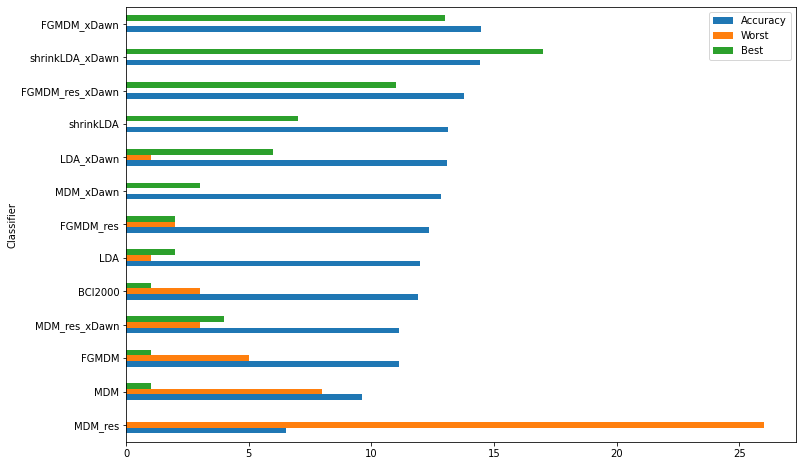

In [9]:
performance.plot(kind="barh",figsize=(12,8),align="center",ylabel="Number of Sessions")
#plt.savefig(r"D:\Master\Masterarbeit\Graphics\best_worst",bbox_inches="tight",pad_inches=0.2,)


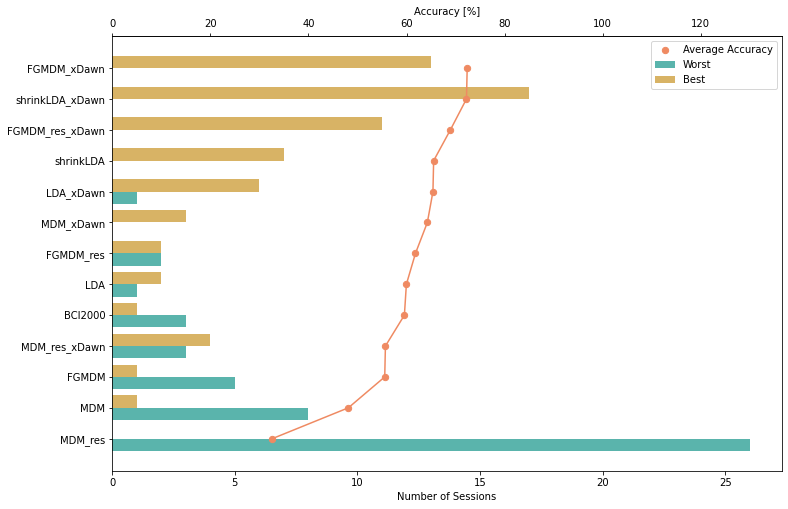

In [83]:
def Per2Ac(x):
    return x*5

def Ac2Per(x):
    return x/5

fig, ax = plt.subplots(figsize=(12,8))
col_list= ["#d8b365","#5ab4ac","#ef8a62","#67a9cf"]
y= np.arange(len(performance.index))
height=0.8
ax.barh(y- (height/4),performance.Worst, label="Worst",height=height/2, color =col_list[1])
ax.barh(y+( height/4),performance.Best, label="Best",height=height/2,color =col_list[0])
ax.scatter(performance.Accuracy,performance.index, alpha=1,label="Average Accuracy", marker ="o",color =col_list[2], s=40,zorder=4)
ax.plot(performance.Accuracy,performance.index, alpha=1,color =col_list[2])
ax.set_xlabel("Number of Sessions")
sec_ax = ax.secondary_xaxis("top",functions= (Per2Ac,Ac2Per))
sec_ax.set_xlabel("Accuracy [%]")
ax.legend()
plt.savefig(r"D:\Google Drive\Master\Masterarbeit\Graphics\best_worst",bbox_inches="tight",pad_inches=0.2,)

In [340]:
data_list = [sess3,
sess1,
trans3,
trans1]
color_list = ["#a6611a",
"#dfc27d",
"#80cdc1",
"#018571"]
width =1
x=[-width/2,-width/4,width/4,width/2]

In [42]:
trans1 = trans1.loc[(trans1.Ep2Avg==8)].groupby("Classifier").mean()
trans3 = trans3.loc[(trans3.Ep2Avg==8)].groupby("Classifier").mean()
sess1 = sess1.loc[(sess1.Ep2Avg==8)].groupby("Classifier").mean()
sess3 = sess3.loc[(sess3.Ep2Avg==8)].groupby("Classifier").mean()
all_con = all_con.loc[(all_con.Ep2Avg==8)].groupby("Classifier").mean()

In [47]:
(trans3-sess3).mean()

Accuracy   -0.107201
Session     0.000000
Ep2Avg      0.000000
ITR        -0.585691
dtype: float64

In [93]:
all_con.sort_values("Accuracy")

,Accuracy,Session,Ep2Avg,ITR
Classifier,,,,
MDM_res,0.190883,20.0,8.0,0.552861
MDM,0.226496,20.0,8.0,0.671481
LDA,0.287749,20.0,8.0,1.461496
LDA_xDawn,0.361823,20.0,8.0,2.361409
FGMDM,0.384615,20.0,8.0,2.321563
shrinkLDA,0.421652,20.0,8.0,3.320693
MDM_res_xDawn,0.433048,20.0,8.0,3.513850
FGMDM_res,0.443020,20.0,8.0,3.707356
FGMDM_res_xDawn,0.461538,20.0,8.0,3.882416


# Amplitudes

In [36]:
pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Investigation\average_amplitudes_350_600.csv").groupby("Electrode").std()

,Unnamed: 0,Session,Tactilo,Mean Amplitude
Electrode,,,,
C3,461.734772,14.289308,1.711583,2.311490
C4,461.734772,14.289308,1.711583,1.529069
Cz,461.734772,14.289308,1.711583,1.543953
Fc1,461.734772,14.289308,1.711583,2.388879
Fc2,461.734772,14.289308,1.711583,1.983899
Fz,461.734772,14.289308,1.711583,2.849551
Pz,461.734772,14.289308,1.711583,1.569967


In [37]:
pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Investigation\average_amplitudes_350_600.csv").groupby("Tactilo").mean()

,Unnamed: 0,Session,Mean Amplitude
Tactilo,,,
1,780.0,27.973684,0.501155
2,787.0,27.973684,3.090504
3,794.0,27.973684,1.625335
4,801.0,27.973684,2.959833
5,808.0,27.973684,1.618651
6,815.0,27.973684,2.249101


In [39]:
amp = pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Classifier_Results\amp.csv")
t = amp.loc[(amp.Condition=="Target")&(amp.Electrode=="Cz")]
nt= amp.loc[(amp.Condition=="nonTarget")&(amp.Electrode=="Cz")]


In [40]:
amp = pd.read_csv(r"D:\Google Drive\Master\Masterarbeit\Data\Classifier_Results\amp.csv")
t = amp.loc[(amp.Condition=="Target")&(amp.Electrode=="Cz") ]
nt= amp.loc[(amp.Condition=="nonTarget")&(amp.Electrode=="Cz")]

t= t.groupby('Dates').mean()
t =t.drop(columns=["Unnamed: 0","Session","Tactilo"])
t = t.set_index(pd.to_datetime(t.index,dayfirst=True),drop=True)
t = t.sort_index()
nt= nt.groupby('Dates').mean()
nt =nt.drop(columns=["Unnamed: 0","Session","Tactilo"])
nt= nt.set_index(pd.to_datetime(nt.index,dayfirst=True),drop=True)
nt = nt.sort_index()

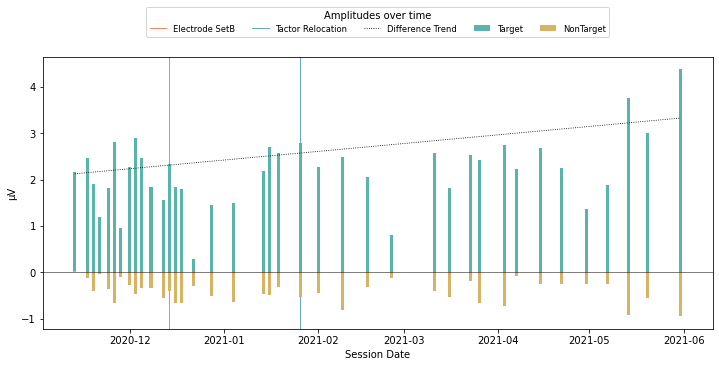

In [41]:
def plot_timeline(tar_df, ntar_df,electrode,title):
    col_list= ["#d8b365","#5ab4ac","#ef8a62","#67a9cf"]
    lr = LinearRegression()

    x = tar_df.index.map(dt.datetime.toordinal).to_numpy()
    x = x.reshape(-1,1)

    fig, ax = plt.subplots(figsize = (12,5))
    y = tar_df["Mean Amplitude"].to_numpy()-ntar_df["Mean Amplitude"].to_numpy()
    y.reshape(-1,1)
    lr.fit(x,y)
    pred = lr.predict(x)
    ax.axvline(x=tar_df.index.values[12],lw=1,alpha=1,zorder=0,c=col_list[2])
    ax.axvline(x=tar_df.index.values[21],lw=1,alpha=1,zorder=0,c=col_list[3])
    tar = ax.bar(tar_df.index,tar_df["Mean Amplitude"], width=1,color=col_list[1])
    ntar = ax.bar(tar_df.index,ntar_df["Mean Amplitude"], width=1,color=col_list[0])
    trend = ax.plot(tar_df.index,pred,c="k",ls=":",lw=0.85)
    lgd =ax.legend(["Electrode SetB","Tactor Relocation","Difference Trend", "Target", "NonTarget"], ncol=5, title=title,loc='center', bbox_to_anchor=(0.5, 1.13),fontsize='small', fancybox=True)
    #ax.set_title(electrode)
    ax.axhline(y=0,c='k',lw=0.5)
    ax.set_ylabel("µV")

    ax.set_xlabel("Session Date")
    #fig.suptitle(title)
    fig.tight_layout
    plt.savefig(r"D:\Google Drive\Master\Masterarbeit\Graphics\Timeline.png",bbox_inches="tight",pad_inches=0.2)
plot_timeline(t,nt,"Cz","Amplitudes over time")